# One-way ANOVA
## Michael NANA KAMENI

We use one-way analysis of variance (ANOVA) to test whether there are statistically significant differences between the means of independent groups. In this tutorial we will carry out a one-way ANOVA test for a small dataset.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
%matplotlib inline

### The data
We are going to use a hypothetical example to illustrate how to conduct a one-way ANOVA test. The example comes from [Comparing Three or More Means (One-Way Anaylsis of Variance)](http://www.napavalley.edu/people/cburditt/Documents/Math%20232%20-%20Statistics/Sullivan%20ANOVA.pdf). "A stock analyst wondered whether the mean rate of return of financial, energy, and utility stocks differed over the past 5 years. He obtained a simple random sample of eight companies from each of the three sectors and obtained the 5-year rates of return shown in
the following table (in percent):"

In [3]:
data = pd.read_csv('returns.csv', sep=',')

In [4]:
data

,Financial,Energy,Utilities
0,10.76,12.72,11.88
1,15.05,13.91,5.86
2,17.01,6.43,13.46
3,5.07,11.19,9.90
4,19.50,18.79,3.95
5,8.16,20.73,3.44
6,10.38,9.60,7.11
7,6.75,17.40,15.70


### Explore the data

In order to perform the one-way ANOVA test, the groups of observations must be independent. For this example, let's take it that since the analyst used a simple random sampling method, his data is independent.

Now, let's generate descriptive statistics of the data to explore the data further.

In [5]:
data.describe()

,Financial,Energy,Utilities
count,8.000000,8.000000,8.000000
mean,11.585000,13.846250,8.912500
std,5.123751,4.867023,4.530414
min,5.070000,6.430000,3.440000
25%,7.807500,10.792500,5.382500
50%,10.570000,13.315000,8.505000
75%,15.540000,17.747500,12.275000
max,19.500000,20.730000,15.700000


As you can see, the three stock groups have differing means. However, considering the standard deviations, there is some overlap. We want to establish whether these means are actually equal or not. Enter the one-way ANOVA below.

### The hypothesis

We state the null and alternative hypotheses as follows:

$H_0:$ the means of the different groups are equal

$H_1:$ the means are different.

We use a significance level of 0.05.



### Visualize the means

[Text(0, 0.5, '')]

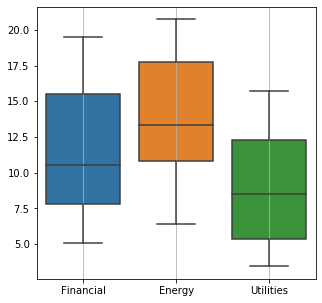

In [6]:
f, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(data=data)
ax.xaxis.grid(True) # tweak the visual presentation
ax.set(ylabel="")

In [7]:
print(data['Financial'].std(), data['Energy'].std(), data['Utilities'].std())

5.123751415850361 4.867022960701952 4.530413888377088


Energy stock returns seem better than the other two returns as the mean stock return is greater. The standard deviations are similar so stock returns within each group are equally spread out.

### The test

We perform the one-way ANOVA test using the `f_oneway()` function in `scipy.stats`.

In [8]:
stats.f_oneway(data['Financial'], data['Energy'], data['Utilities'])

F_onewayResult(statistic=2.0774678927362995, pvalue=0.15023075784476628)

We obtain a p value of 0.1, which is greater than the 0.05 significance level. This value indicates evidence in support of the null hypothesis, that the mean values of the different groups are equal.

### Post-hoc tests

A significant p-value indicates there is some difference between group means but it does not indicate which pairs of groups are different. We perform multiple pairwise comparison to determine which group means differ significantly. In practice, there are a few tests to choose from to do this further comparison, each with its own assumptions and limitations. For us, we will use the Tukey HSD (Honest Significant Differences) to performn multiple pairwise comparison between group means. See the references section at the end of this notebook for more on multiple comparisons. 

Unfortunately our test results do not indicate a significant different between the means of the three groups. However, if necessary,the Tukey HSD test function is available from the following library:

In [9]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

### Reporting on ANOVA

A one-way ANOVA was conducted to compare the three stock return options. There was no significant difference between the mean returns of the three stock options (F=2.0774, p = 0.15). No post hoc comparisons were carried out.

### Exercise

#### Question 1
Load the following dataset into a Pandas dataframe: `stcp-Rdataset-Diet.csv`. Investigate the data. Generate summary statistics.


In [10]:
# Let's load the dataset from stcp-Rdataset-Diet.csv into a Pandas dataframe:
data = pd.read_csv('stcp-Rdataset-Diet.csv', sep =',')
data

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,25,,41,171,60,2,60.0
1,26,,32,174,103,2,103.0
2,1,0,22,159,58,1,54.2
3,2,0,46,192,60,1,54.0
4,3,0,55,170,64,1,63.3
...,...,...,...,...,...,...,...
73,74,1,35,183,83,3,80.2
74,75,1,49,177,84,3,79.9
75,76,1,28,164,85,3,79.7
76,77,1,40,167,87,3,77.8


In [11]:
# Let's clean our data by drop null values and removing duplicated values.
data.dropna(inplace=True)             # Drop null values
data.drop_duplicates(inplace=True)    # Remove duplicated values

In [12]:
# Let's check summary statistics
data.describe()

,Person,Age,Height,pre.weight,Diet,weight6weeks
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,39.500000,39.153846,170.820513,72.525641,2.038462,68.680769
std,22.660538,9.815277,11.276621,8.723344,0.812920,8.924504
min,1.000000,16.000000,141.000000,58.000000,1.000000,53.000000
25%,20.250000,32.250000,164.250000,66.000000,1.000000,61.850000
50%,39.500000,39.000000,169.500000,72.000000,2.000000,68.950000
75%,58.750000,46.750000,174.750000,78.000000,3.000000,73.825000
max,78.000000,60.000000,201.000000,103.000000,3.000000,103.000000


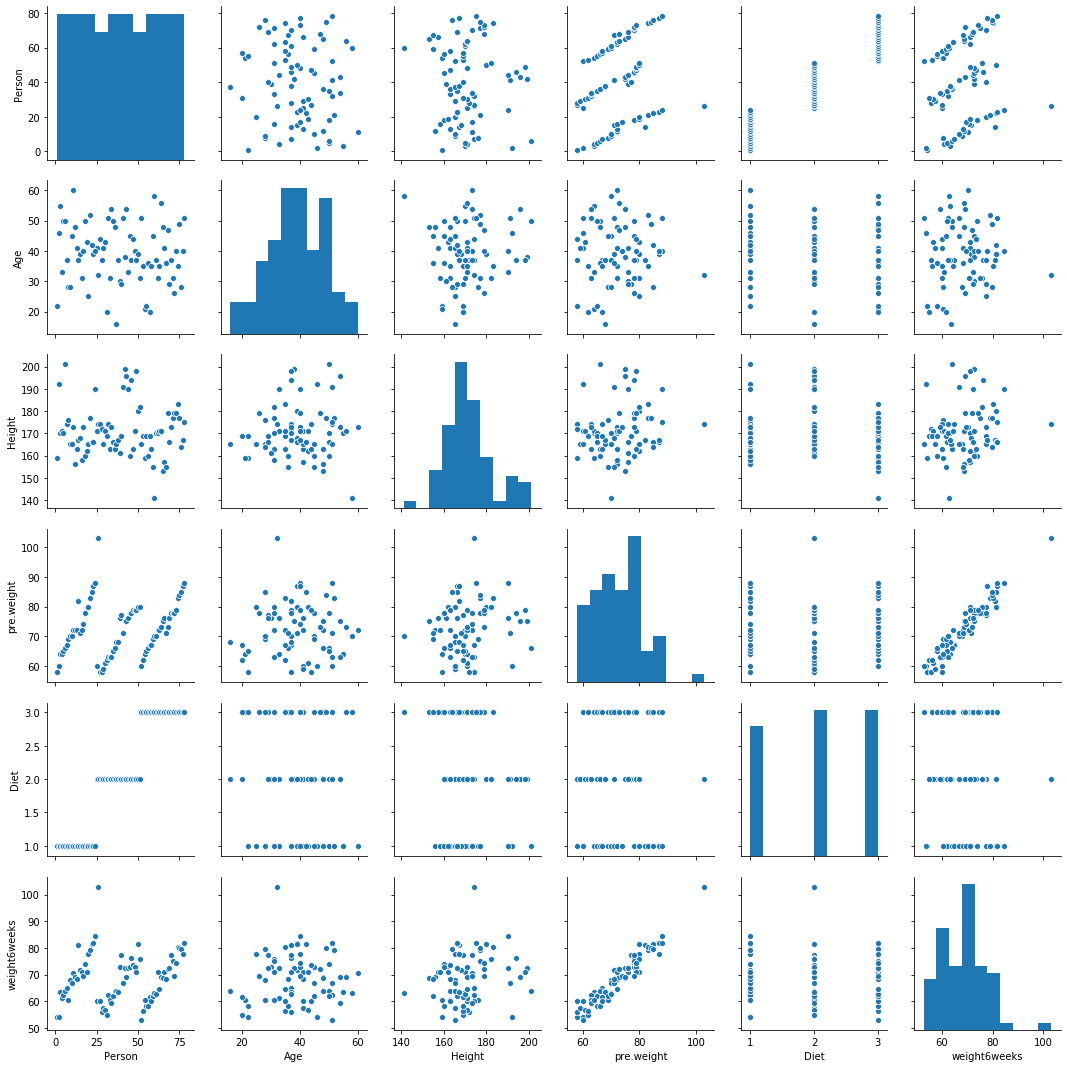

In [13]:
# Let's have a look at the distribution of data in each see if there are outlier.
data1 =data.drop(axis=1, columns='gender')
sns.pairplot(data1)

We could easily note that there are outlier in the distribution of Diet, weight6weeks, and pre.weight. Let's deal with that outlier.

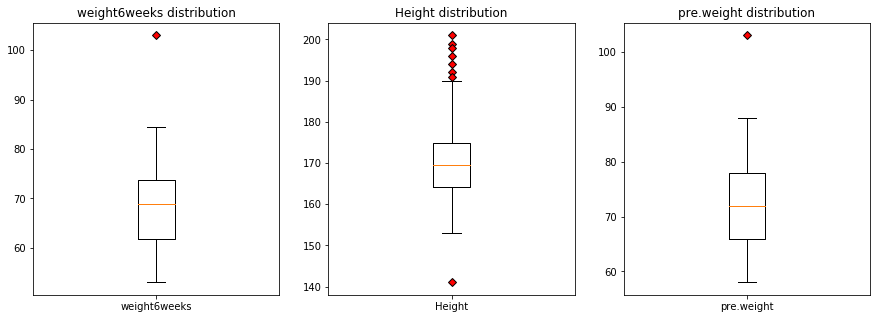

In [14]:
# Let's plot a box-and-whisker plot to have a deep look at some data distribution

fig, ax = plt.subplots(nrows = 1, ncols= 3, figsize=(15,5))
(ax1, ax2, ax3)= ax

# create outlier point shape
red_diamond = dict(markerfacecolor='r', marker='D')

# set title
ax1.set_title('weight6weeks distribution')
# make the boxplot
ax1.boxplot(data['weight6weeks'].values, labels=['weight6weeks'], flierprops=red_diamond);

# set title
ax2.set_title('Height distribution')
# make the boxplot
ax2.boxplot(data['Height'].values, labels=['Height'], flierprops=red_diamond);

# set title
ax3.set_title('pre.weight distribution')
# make the boxplot
ax3.boxplot(data['pre.weight'].values, labels=['pre.weight'], flierprops=red_diamond);

In [15]:
# Let's deal with that outlier.

# Compute a function remove outlier to remove outlier in a column
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    data_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return data_out

In [16]:
new_data = remove_outlier(data, 'Height')

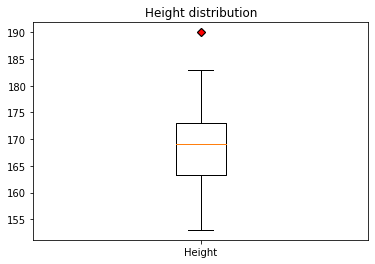

In [17]:
# create outlier point shape
red_diamond = dict(markerfacecolor='r', marker='D')
plt.title('Height distribution')
# make the boxplot
plt.boxplot(new_data['Height'].values, labels=['Height'], flierprops=red_diamond);

In [18]:
new_data = remove_outlier(new_data, 'Height')

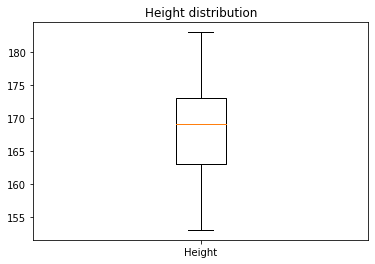

In [19]:
# create outlier point shape
red_diamond = dict(markerfacecolor='r', marker='D')
plt.title('Height distribution')
# make the boxplot
plt.boxplot(new_data['Height'].values, labels=['Height'], flierprops=red_diamond);

In [20]:
new_data = remove_outlier(new_data, 'weight6weeks')
new_data = remove_outlier(new_data, 'pre.weight')

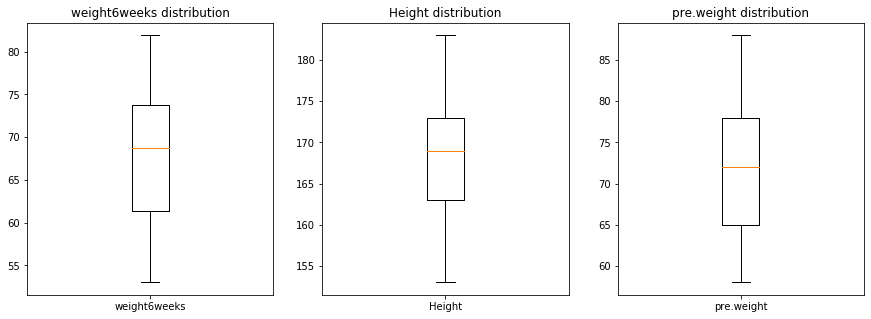

In [21]:
# Let's plot a box-and-whisker plot to have a deep look at some data distribution

fig, ax = plt.subplots(nrows = 1, ncols= 3, figsize=(15,5))
(ax1, ax2, ax3)= ax

# create outlier point shape
red_diamond = dict(markerfacecolor='r', marker='D')

# set title
ax1.set_title('weight6weeks distribution')
# make the boxplot
ax1.boxplot(new_data['weight6weeks'].values, labels=['weight6weeks'], flierprops=red_diamond);

# set title
ax2.set_title('Height distribution')
# make the boxplot
ax2.boxplot(new_data['Height'].values, labels=['Height'], flierprops=red_diamond);

# set title
ax3.set_title('pre.weight distribution')
# make the boxplot
ax3.boxplot(new_data['pre.weight'].values, labels=['pre.weight'], flierprops=red_diamond);

In [22]:
# Let's check summary statistics
new_data.describe()

,Person,Age,Height,pre.weight,Diet,weight6weeks
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,40.268657,38.477612,168.029851,71.880597,2.074627,68.061194
std,23.340420,9.852485,6.923763,8.126877,0.840516,8.082584
min,1.000000,16.000000,153.000000,58.000000,1.000000,53.000000
25%,19.500000,31.000000,163.000000,65.000000,1.000000,61.350000
50%,38.000000,39.000000,169.000000,72.000000,2.000000,68.700000
75%,61.500000,45.000000,173.000000,78.000000,3.000000,73.750000
max,78.000000,60.000000,183.000000,88.000000,3.000000,81.900000


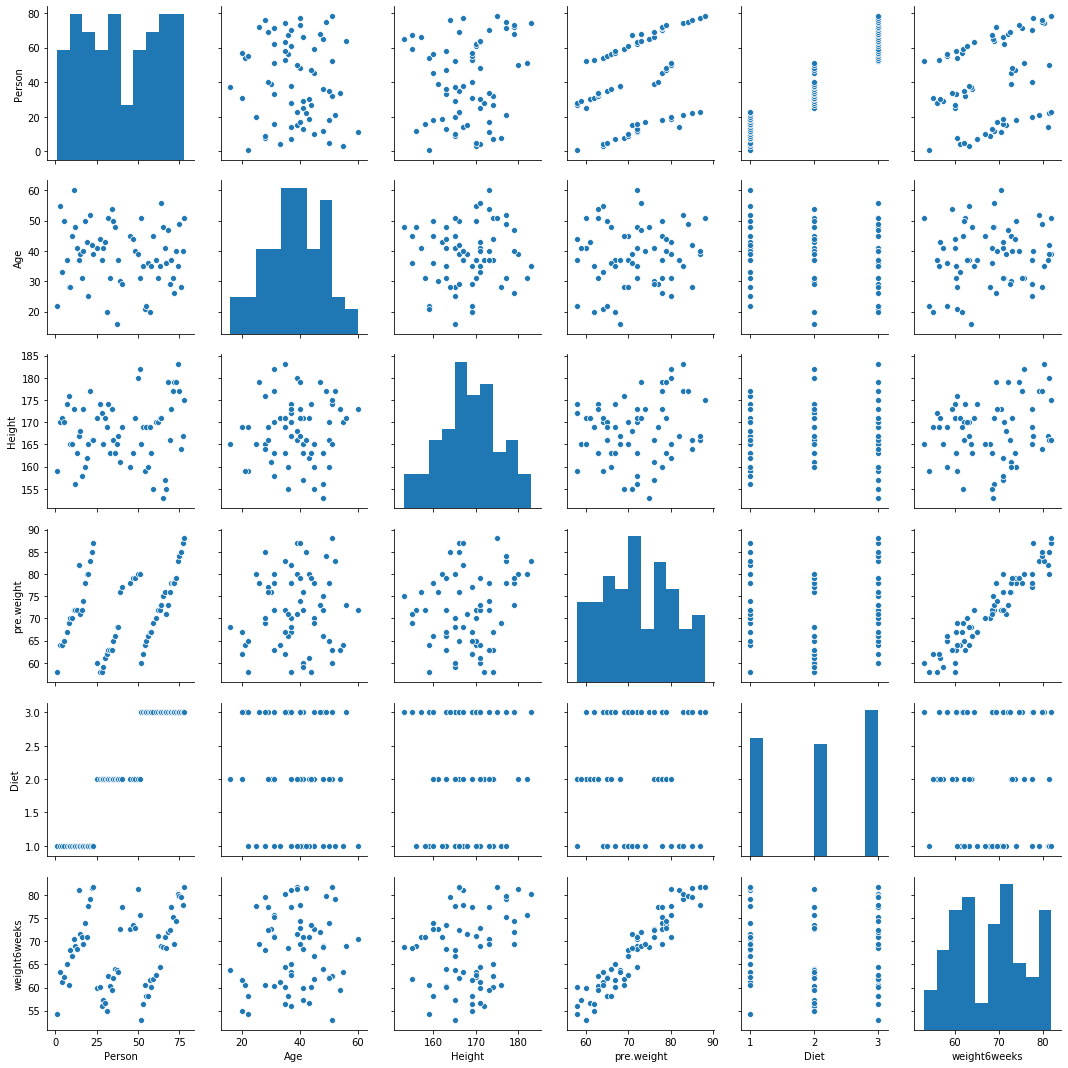

In [23]:
sns.pairplot(new_data)

We can remark that there are anymore outlier in the distribution of each individual attribut and the correlations show a very strong relationship between pre.weight and weight6weeks. 

##### Question 2
You need to compare three diets. Generate visualizations to visualize the mean. Discuss the results.

In [24]:
diet = new_data.groupby(['Diet'])
diet

In [25]:
# Let's 
df_diet1 = list(diet)[0][1]
df_diet2 = list(diet)[1][1]
df_diet3 = list(diet)[2][1]

In [26]:
print(df_diet1.shape, df_diet2.shape, df_diet3.shape)

(21, 7) (20, 7) (26, 7)


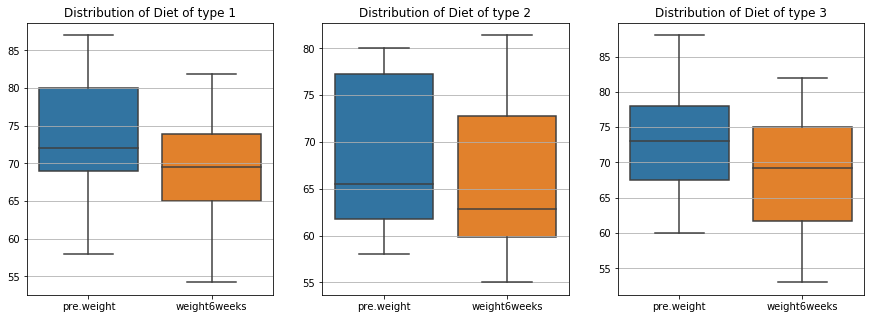

In [27]:
fig, ax = plt.subplots(ncols = 3, figsize=(15, 5))
(ax1, ax2, ax3) = ax

# Plot boxplot
sns.boxplot(data = df_diet1.loc[:,['pre.weight', 'weight6weeks']], ax =ax1).set_title('Distribution of Diet of type 1')
sns.boxplot(data = df_diet2.loc[:,['pre.weight', 'weight6weeks']], ax =ax2).set_title('Distribution of Diet of type 2')
sns.boxplot(data = df_diet3.loc[:,['pre.weight', 'weight6weeks']], ax =ax3).set_title('Distribution of Diet of type 3')

# Set y grid
ax1.yaxis.grid(True)
ax2.yaxis.grid(True)
ax3.yaxis.grid(True)

In [29]:
print(df_diet1[['pre.weight', 'weight6weeks']].mean(), df_diet1[['pre.weight', 'weight6weeks']].std())

pre.weight      73.095238
weight6weeks    69.871429
dtype: float64 pre.weight      7.660971
weight6weeks    7.496609
dtype: float64


In [30]:
print(df_diet2[['pre.weight', 'weight6weeks']].mean(), df_diet2[['pre.weight', 'weight6weeks']].std())

pre.weight      68.15
weight6weeks    65.34
dtype: float64 pre.weight      8.247966
weight6weeks    8.029774
dtype: float64


In [31]:
print(df_diet3[['pre.weight', 'weight6weeks']].mean(), df_diet3[['pre.weight', 'weight6weeks']].std())

pre.weight      73.769231
weight6weeks    68.692308
dtype: float64 pre.weight      7.721698
weight6weeks    8.331479
dtype: float64


## Interpretation
Of the 78 Diets as sample, after data pre-processing, we have just remained with 67. 21 of the 67 diets were of type 1, 20 were of type 2, and the rest of 26 were of type 3. Means (±SD) of the diet of type 1, type 2 and tye 3 were respectively 73.1(±7.66), 68.15(±8.25), and 73.77(±7.72) for the pre.weight, and 69.87(±7.49), 65.34(±8.03), and 68.69(±8.33) for the weight  after 6 weeks.

#### Question 3 
Formulate an hypothesis about the diet groups in the dataset. Test your hypothesis.

## Formulation of test hypothesis

The null hypothesis and the alternative one about groups in the dataset is defined as follow:

- $H_0$: the mean of different diets are equal i.e there is no variation in the mean of different diet.
- $H_1$: At least, one diet mean is different from the mean of other type of diets.

We use a 5% significance level to test the null hypothesis.

## Test of hypothesis

## References


For more on multiple comparisons, you can refer to the resource linked below which also provides a comparison of other methods available apart from Tukey and when to use them.

[Using Multiple Comparisons](https://support.minitab.com/en-us/minitab/18/help-and-how-to/modeling-statistics/anova/supporting-topics/multiple-comparisons/using-multiple-comparisons-to-assess-differences-in-means/)
